In [1]:
import tensorflow as tf
from keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np


d:\Internship report\Task_3\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
# Load CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to range 0-1
train_images = train_images / 255.0
test_images  = test_images / 255.0

print("Train shape:", train_images.shape, train_labels.shape)
print("Test shape:", test_images.shape, test_labels.shape)


d:\Internship report\Task_3\.venv\Lib\site-packages\keras\src\datasets\cifar.py:18: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  d = cPickle.load(f, encoding="bytes")


Train shape: (50000, 32, 32, 3) (50000, 1)
Test shape: (10000, 32, 32, 3) (10000, 1)


In [4]:
# Data augmentation to improve generalization
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

datagen.fit(train_images)


In [5]:
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPool2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPool2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # 10 classes
])

model.summary()


d:\Internship report\Task_3\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,362,698 (9.01 MB)

 Trainable params: 2,361,418 (9.01 MB)

 Non-trainable params: 1,280 (5.00 KB)

In [6]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [7]:
batch_size = 64
epochs = 20

history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=batch_size),
    steps_per_epoch=train_images.shape[0] // batch_size,
    epochs=epochs,
    validation_data=(test_images, test_labels)
)


Epoch 1/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 418s 530ms/step - accuracy: 0.4580 - loss: 1.5779 - val_accuracy: 0.4707 - val_loss: 1.5513
Epoch 2/20
  1/781 ━━━━━━━━━━━━━━━━━━━━ 6:56 534ms/step - accuracy: 0.5625 - loss: 1.0895

d:\Internship report\Task_3\.venv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.5625 - loss: 1.0895 - val_accuracy: 0.4994 - val_loss: 1.4500
Epoch 3/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 391s 500ms/step - accuracy: 0.6084 - loss: 1.0995 - val_accuracy: 0.6377 - val_loss: 1.1142
Epoch 4/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.6875 - loss: 0.9628 - val_accuracy: 0.6310 - val_loss: 1.1359
Epoch 5/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 392s 502ms/step - accuracy: 0.6641 - loss: 0.9596 - val_accuracy: 0.6684 - val_loss: 0.9878
Epoch 6/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.6719 - loss: 0.9095 - val_accuracy: 0.6717 - val_loss: 0.9811
Epoch 7/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 367s 470ms/step - accuracy: 0.6931 - loss: 0.8745 - val_accuracy: 0.7122 - val_loss: 0.8566
Epoch 8/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.7500 - loss: 0.8552 - val_accuracy: 0.7113 - val_loss: 0.8551
Epoch 9/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 401s 513ms/step - accuracy: 0.7209 - loss: 0.8065 - val

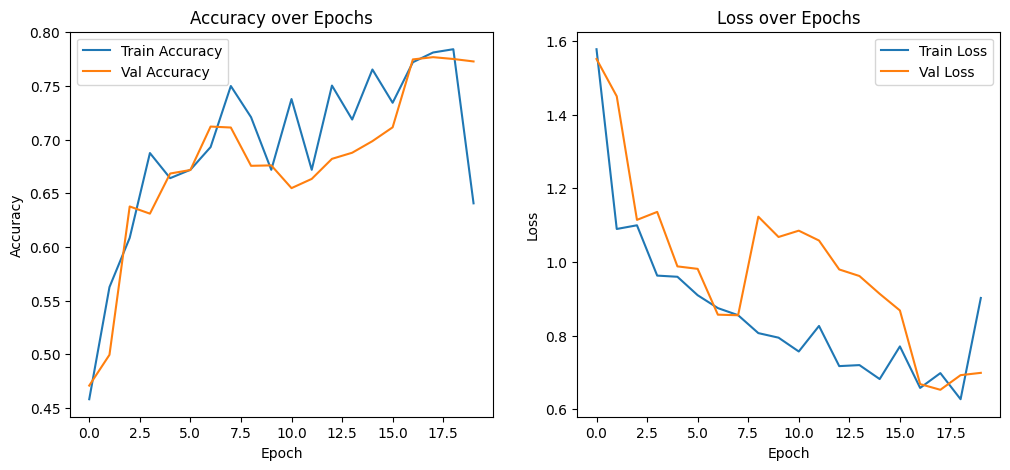

In [8]:
# Plot training & validation accuracy
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


313/313 - 11s - 36ms/step - accuracy: 0.7729 - loss: 0.6986
Test Accuracy: 0.7729
Test Loss: 0.6986
